In [50]:
# check for proper interpreter
import sys
import gdal
import pandas as pd
import ogr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import geopandas
sys.executable

'C:\\Users\\maggi\\anaconda3\\envs\\capstone4\\python.exe'

In [3]:
# set up paths for training data
import os
SCRIPT_PATH = os.path.dirname(os.path.realpath('__file__'))
OAHU_IMG_DIR = os.path.join(SCRIPT_PATH, 'data', 'Oahu_6545')
OAHU_IMG_DIR

'C:\\Users\\maggi\\01Jupyter\\amts-springboard-capstone\\data\\Oahu_6545'

In [7]:
# create variables for multi-spectral band TIFs
OAHU_B1 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B1.TIF')
OAHU_B2 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B2.TIF')
OAHU_B3 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B3.TIF')
OAHU_B4 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B4.TIF')
OAHU_B5 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B5.TIF')

## EDA

#### Explore raster (image) band properties. 

In [4]:
# gdal is an open source library
import gdal

In [24]:
# open raster
_b1 = gdal.Open(os.path.abspath(OAHU_B1), gdal.GA_ReadOnly)

In [32]:
print('Band 1 (Aerosol)')
print(f'\tNumber of rows: {_b1.RasterYSize}')
print(f'\tNumber of columns: {_b1.RasterXSize}')
print(f'\tBands (should just be 1): {_b1.RasterCount}')
print(f'\tCoordinate System (WKT): {_b1.GetProjection()}')

Band 1 (Aerosol)
	Number of rows: 7761
	Number of columns: 7601
	Bands (should just be 1): 1
	Coordinate System (WKT): PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32604"]]


In [35]:
# verify all bands 2-5 are the same size and projection as band 1
_rasters = [OAHU_B2, OAHU_B3, OAHU_B4, OAHU_B5]
_band = 1
for _rstr in _rasters:
    _path = os.path.abspath(_rstr)
    _open = gdal.Open(os.path.abspath(OAHU_B1), gdal.GA_ReadOnly)
    print(f'Band: {_band + 1}')
    print(f'\tNumber of rows: {_open.RasterYSize}')
    print(f'\tNumber of columns: {_open.RasterXSize}')
    print(f'\tBands (should just be 1): {_open.RasterCount}')
    print(f'\tCoordinate System (WKT): {_open.GetProjection()}')
    _band = _band + 1

Band: 2
	Number of rows: 7761
	Number of columns: 7601
	Bands (should just be 1): 1
	Coordinate System (WKT): PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32604"]]
Band: 3
	Number of rows: 7761
	Number of columns: 7601
	Bands (should just be 1): 1
	Coordinate System (WKT): PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHO

In [6]:
# Visualize raster band images 
# Choose a random point on the rasters and make sure the points align... print an array maybe?
import matplotlib
import matplotlib.pyplot as plt
import rasterio

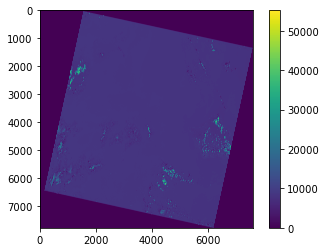

In [30]:
# Show band 1
_b1array = _b1.ReadAsArray()
plt.imshow(_b1array)
plt.colorbar()

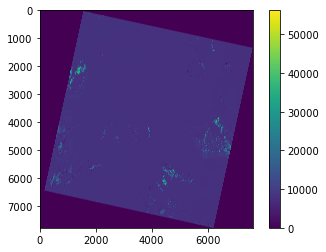

In [39]:
# Show band 2
_b2 = gdal.Open(os.path.abspath(OAHU_B2), gdal.GA_ReadOnly)
_b2array = _b2.ReadAsArray()
plt.imshow(_b2array)
plt.colorbar()

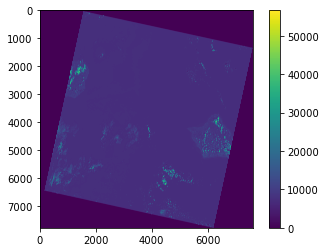

In [40]:
# Show band 3
_b3 = gdal.Open(os.path.abspath(OAHU_B3), gdal.GA_ReadOnly)
_b3array = _b3.ReadAsArray()
plt.imshow(_b3array)
plt.colorbar()

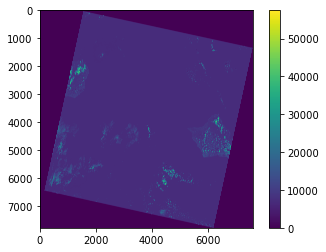

In [41]:
# Show band 4
_b4 = gdal.Open(os.path.abspath(OAHU_B4), gdal.GA_ReadOnly)
_b4array = _b4.ReadAsArray()
plt.imshow(_b4array)
plt.colorbar()

Text(0, 0.5, 'Row #')

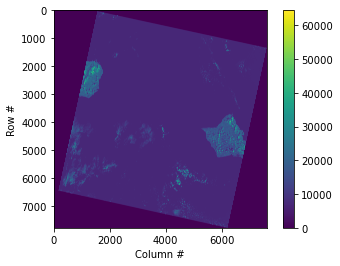

In [27]:
# Show band 5
_b5 = gdal.Open(os.path.abspath(OAHU_B5), gdal.GA_ReadOnly)
_b5array = _b5.ReadAsArray()
plt.imshow(_b5array)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

In [30]:
# try the above with rasterio lib
import rasterio as rio

In [33]:
_r1 = rio.open(OAHU_B1)
_r2 = rio.open(OAHU_B2)
_r3 = rio.open(OAHU_B3)
_r4 = rio.open(OAHU_B4)
_r5 = rio.open(OAHU_B5)

Text(0.5, 1.0, 'Band-5')

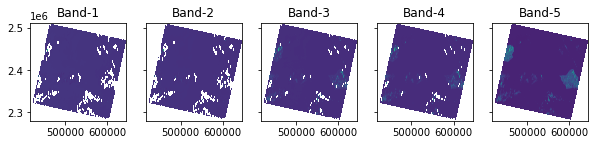

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
from rasterio.plot import show

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, nrows=1, figsize=(10, 4), sharey=True)

# Plot 5 bands
show(_r1, ax=ax1)
show(_r2, ax=ax2)
show(_r3, ax=ax3)
show(_r4, ax=ax4)
show(_r5, ax=ax5)

# Add titles
ax1.set_title("Band-1")
ax2.set_title("Band-2")
ax3.set_title("Band-3")
ax4.set_title("Band-4")
ax5.set_title("Band-5")

In [58]:
# merge colorbands with gdal
_rasters = [OAHU_B4, OAHU_B3, OAHU_B2]
test = gdal.BuildVRT('test2.vrt', _rasters, options=gdal.BuildVRTOptions(separate=True))
test = gdal.Open('test2.vrt')
gdal.Translate('test3.tif', test)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000021C810265D0> >

In [60]:
# double check that the output is multi-band (i.e. output should be 3)
r = gdal.Open('test3.tif')
r.RasterCount

3

In [69]:
# look at statistics after converting these to array
_multi = gdal.Open(os.path.abspath('test3.tif'), gdal.GA_ReadOnly)
rows = _multi.RasterYSize
cols =_multi.RasterXSize
bands = _multi.RasterCount

_multiarray = _multi.ReadAsArray()
_multiarray = np.stack(_multiarray,axis=2)
_multiarray = np.reshape(_multiarray, [rows*cols, bands])
print(np.max(_multiarray))  # make sure we have values
print(np.min(_multiarray))

57449
0


In [75]:
test = pd.DataFrame(_multiarray, dtype='int16')
test.sort_values(1)
# plan to write these to csv for wrangling
# will need to understand what the negative values represent at some point

,0,1,2
16358707,-32332,-32768,32398
38033803,-32063,-32768,-32477
33176365,-31820,-32768,32244
46347769,32749,-32768,31991
34081260,-31321,-32768,31934
...,...,...,...
16237132,-31599,32767,-29786
17536612,-31785,32767,32390
47328082,-32312,32767,32152
19946085,-32098,32767,29846


<AxesSubplot:ylabel='Frequency'>

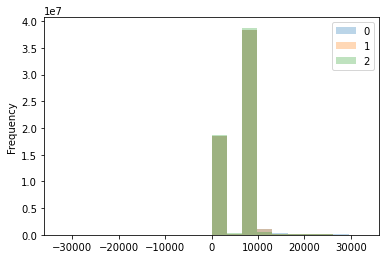

In [84]:
# look at histogram for each band (pandas dataframe columns)
test.plot.hist(bins=20, alpha=0.3)

<AxesSubplot:ylabel='Frequency'>

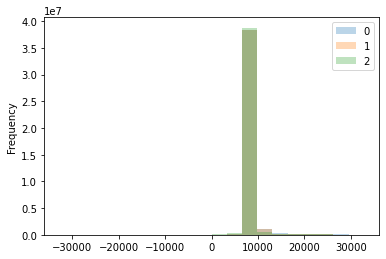

In [89]:
# need to drop 0's
new = test.loc[~(test==0).all(axis=1)]
new.plot.hist(bins=20, alpha=0.3)

In [90]:
new

,0,1,2
320787,8618,8845,9784
320788,8959,9207,9879
320789,8811,8994,10010
328388,8612,8903,9639
328389,9027,9162,9485
...,...,...,...
58936742,7151,7300,7645
58936743,7139,7294,7671
58936744,7318,7472,8053
58944344,7318,7501,8053


## Wrangling

#### Process
1. Create a shapefile to clip the satellite image (manually via GIS software) - Done
2. Create 1,000 random points on the clipped image and print dataframe - Done
3. Create random shapefiles areas for sampling (manually via GIS software) - Done
4. Print dataframe of pixels within shapefile bounds
5. Get elevation information at points
6. Get elevation information at shapefiles
7. Filter out noise (clouds, waves, algae, etc.)

### Step 1

In [8]:
# merge colorbands with gdal
rasters = [OAHU_B4, OAHU_B3, OAHU_B2, OAHU_B5] # red, green, blue channel
test = gdal.BuildVRT('temp.vrt', rasters, options=gdal.BuildVRTOptions(separate=True))
test = gdal.Open('temp.vrt')
gdal.Translate('Oahu.tif', test)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001E2DD2B41E0> >

In [9]:
os.remove('temp.vrt')

In [17]:
# get shapefile bounds
def return_extent(shp_path):
    driver = ogr.GetDriverByName("ESRI Shapefile")
    shp = driver.Open(shp_path, 1)
    lyr = shp.GetLayer()
    for poly in lyr:
        geom = poly.GetGeometryRef()
        extent = geom.GetEnvelope()
        break
    return extent

In [19]:
shp_path = os.path.join(SCRIPT_PATH, 'data', 'Oahu_Clip', 'Clip_extent.shp')
return_extent(shp_path)

(-158.39792959860034,
 -157.75913287105402,
 21.129930267608707,
 21.846171559052614)

In [23]:
# clip raster to shapefile
# helpful link: https://www.youtube.com/watch?v=1jHhQKJOQ5M&t=252s
def clip_raster(shp_path, output_path, input_path):
    gdal.Warp(output_path, input_path, cutlineDSName=shp_path, cropToCutline=True, dstNodata=np.nan)

In [28]:
oahu_clipped = clip_raster(shp_path, "Oahu_clipped.tif", "Oahu.tif")

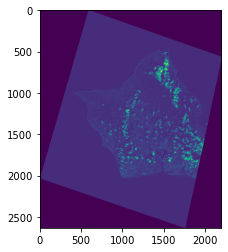

In [31]:
# veiw clipped raster
output = gdal.Open(os.path.abspath('Oahu_clipped.tif'), gdal.GA_ReadOnly)
array = output.GetRasterBand(1).ReadAsArray()
plt.imshow(array)

### Step 2

In [48]:
# Performed manually in QGIS - source code below:
# processing.run("native:randompointsinpolygons", {'INPUT':'C:\\Users\\maggi\\01Jupyter\\amts-springboard-capstone\\data\\Oahu_Clip\\Clip_extent.shp','POINTS_NUMBER':1000,'MIN_DISTANCE':0,'MIN_DISTANCE_GLOBAL':0,'MAX_TRIES_PER_POINT':10,'SEED':None,'INCLUDE_POLYGON_ATTRIBUTES':True,'OUTPUT':'TEMPORARY_OUTPUT'})

# Can also do this programmatically 
# Generate random lat/long pairs
maxX = -157.75913287105402
minX = -158.39792959860034  
maxY = 21.846171559052614
minY = 21.129930267608707

x = []
y = []

for num in range(1000):
    x.append(random.uniform(minX, maxX))
    y.append(random.uniform(minY, maxY))
    
vals = {'Longitude': x, 'Latitude': y}
df = pd.DataFrame(vals)
df

,Longitude,Latitude
0,-158.233261,21.607282
1,-158.346653,21.436873
2,-158.017537,21.245169
3,-158.241841,21.633678
4,-158.343126,21.158693
...,...,...
995,-157.823190,21.289176
996,-158.125781,21.247661
997,-158.280235,21.804989
998,-158.126144,21.625397


In [65]:
# multipoint = ogr.Geometry(ogr.wkbMultiPoint)
# for index, row in df.iterrows():
#     point = ogr.Geometry(ogr.wkbPoint)
#     point.AddPoint(1251243.7361610543, 598078.7958668759)
#     multipoint.AddGeometry(point)
# print(multipoint.ExportToWkt())

In [64]:
# convert point dataframe to a shapefile
gdf = geopandas.GeoDataFrame(df)
gdf.set_geometry(
    geopandas.points_from_xy(gdf['Longitude'], gdf['Latitude']),
    inplace=True, crs='EPSG:4326')
# gdf.drop(['Lat', 'Long'], axis=1, inplace=True)  # optional
gdf.to_file('random_points.shp')